# Data Analysis of Airbnb in Mexico City

## Introduction 

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. The company's name comes from “air mattress B&B.”

For hosts, participating in Airbnb is a way to earn some income from their property, but with the risk that the guest might do damage to it. For guests, the advantage can be relatively inexpensive accommodations, but with the risk that the property won’t be as appealing as the listing made it seem.

[Airbnb: Advantages and Disadvantages]([https://www.investopedia.com/articles/personal-finance/032814/pros-and-cons-using-airbnb.asp)

## Goals

- Confirm quality between neighbourhood and prices using a heatmap.

- Positive and negative reviews per neighbourhood.

- Average room type price by neighbourhoods.

- Mapping Airbnb location.

### Python as programming language used

## References

* Imported and cleaned the dataset from [Airbnb Datasets](http://insideairbnb.com/get-the-data.html). 
    * Get [Listing](http://data.insideairbnb.com/mexico/df/mexico-city/2020-05-24/data/listings.csv.gz) of the available Airbnb in Mexico City
    * Get Airbnb [Reviews](http://data.insideairbnb.com/mexico/df/mexico-city/2020-05-24/data/reviews.csv.gz)
    * Get Mexico [Neighbourhoods](http://data.insideairbnb.com/mexico/df/mexico-city/2020-05-24/visualisations/neighbourhoods.geojson) in a Geojson format.
* [Geospatial Analysis using Folium](https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/)
* [GeoJson Popup and Tooltip](https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/GeoJsonPopupAndTooltip.ipynb)
* [Interactive Map visualization with Folium in Python](https://medium.com/@saidakbarp/interactive-map-visualization-with-folium-in-python-2e95544d8d9b)

##  Team members

|Name|User github|
|:--:|:--:|
|Edgar|[EddOselotl](https://github.com/EddOselotl)|
|Geovanny|[carlosgeovany](https://github.com/carlosgeovany)|
|Caro| [CaroAcostaT](http://github.com/CaroAcostaT)|


## Clean dataset

Clean data set can be found in the project repository [here.](https://github.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-EddOselotl/blob/master/airbnb_clean.csv)

In [111]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import branca
import pyproj
from geopandas import GeoDataFrame
from folium.features import GeoJson, GeoJsonTooltip
from scipy.stats import norm
from scipy import stats

Using [pandas](https://pandas.pydata.org/) we can easily read our dataset

In [71]:
df = pd.read_csv("https://raw.githubusercontent.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-EddOselotl/master/airbnb_clean.csv")

In [14]:
df.head()

,id,name,host_id,host_since,host_total_listings_count,latitude,longitude,neighbourhood_cleansed,property_type,room_type,square_feet,price,review_scores_rating,z_score
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,2010-03-03,9,19.44076,-99.16324,Cuauhtémoc,Boutique hotel,Private room,248.0,2331.0,98.0,0.258975
1,35797,Villa Dante,153786,2010-06-28,2,19.38399,-99.27335,Cuajimalpa de Morelos,Villa,Entire home/apt,32292.0,4457.0,NaN,0.766780
2,56074,Great space in historical San Rafael,265650,2010-10-19,2,19.43937,-99.15614,Cuauhtémoc,Condominium,Entire home/apt,646.0,809.0,97.0,-0.104562
3,58955,Entire beautiful duplex in la Roma,282620,2010-11-09,1,19.42292,-99.15775,Cuauhtémoc,Loft,Entire home/apt,1184.0,1932.0,100.0,0.163672
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,2010-11-26,1,19.41259,-99.17959,Cuauhtémoc,House,Private room,161.0,1364.0,98.0,0.028002


In [15]:
df["price"].describe()

count    21572.000000
mean      1094.957723
std       1248.864035
min         22.000000
25%        401.000000
50%        705.000000
75%       1293.000000
max      13637.000000
Name: price, dtype: float64

In [31]:
# we might want to know what the names of the columns are
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_total_listings_count',
       'latitude', 'longitude', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'square_feet', 'price', 'review_scores_rating', 'z_score',
       'price_log'],
      dtype='object')


### Let's see how long is out data set


In [16]:
print(len(df))

21572


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21572 entries, 0 to 21571
Data columns (total 14 columns):
id                           21572 non-null int64
name                         21565 non-null object
host_id                      21572 non-null int64
host_since                   21572 non-null object
host_total_listings_count    21572 non-null int64
latitude                     21572 non-null float64
longitude                    21572 non-null float64
neighbourhood_cleansed       21572 non-null object
property_type                21572 non-null object
room_type                    21572 non-null object
square_feet                  70 non-null float64
price                        21572 non-null float64
review_scores_rating         16439 non-null float64
z_score                      21572 non-null float64
dtypes: float64(6), int64(3), object(5)
memory usage: 2.3+ MB


In [18]:
df.isnull().sum()

id                               0
name                             7
host_id                          0
host_since                       0
host_total_listings_count        0
latitude                         0
longitude                        0
neighbourhood_cleansed           0
property_type                    0
room_type                        0
square_feet                  21502
price                            0
review_scores_rating          5133
z_score                          0
dtype: int64

### Neighborhoods in our dataset

In [37]:
print("\nIn Mexico City, the following neighborhoods have Airbnb rooms:\n")
for neighborhood in df.neighbourhood_cleansed.unique():
    print("- {}".format(neighborhood))


In Mexico City, the following neighborhoods have Airbnb rooms:

- Cuauhtémoc
- Cuajimalpa de Morelos
- Coyoacán
- Miguel Hidalgo
- Benito Juárez
- Azcapotzalco
- Iztacalco
- Tlalpan
- La Magdalena Contreras
- Venustiano Carranza
- Álvaro Obregón
- Gustavo A. Madero
- Iztapalapa
- Xochimilco
- Tláhuac
- Milpa Alta


Observe how many Airbnb rooms are per neighborhood

In [72]:
df.neighbourhood_cleansed.value_counts()

Cuauhtémoc                8411
Benito Juárez             3436
Miguel Hidalgo            3416
Coyoacán                  1858
Álvaro Obregón            1021
Tlalpan                    902
Cuajimalpa de Morelos      463
Venustiano Carranza        447
Gustavo A. Madero          364
Iztacalco                  335
Iztapalapa                 306
Azcapotzalco               258
La Magdalena Contreras     160
Xochimilco                 137
Tláhuac                     40
Milpa Alta                  18
Name: neighbourhood_cleansed, dtype: int64

### Calculating price statistics by neighborhood

In [53]:
df_stat =(df.groupby("neighbourhood_cleansed").agg(frequency=("neighbourhood_cleansed", "count"),
                                          mean_price =("price","mean"),
                                          median_price =("price","median"),
                                          min_price=("price","min"),
                                          max_price=("price","max")).sort_values(by=["frequency"],ascending=False))

df_stat

,frequency,mean_price,median_price,min_price,max_price
neighbourhood_cleansed,,,,,
Cuauhtémoc,8411,1274.670432,909.0,45.0,13637.0
Benito Juárez,3436,802.038417,580.0,45.0,11994.0
Miguel Hidalgo,3416,1474.877927,1006.0,181.0,13148.0
Coyoacán,1858,817.597417,501.5,22.0,11315.0
Álvaro Obregón,1021,1008.186092,650.0,178.0,12595.0
Tlalpan,902,681.784922,401.0,134.0,11364.0
Cuajimalpa de Morelos,463,1331.602592,981.0,159.0,13149.0
Venustiano Carranza,447,664.152125,490.0,178.0,4992.0
Gustavo A. Madero,364,651.456044,401.0,89.0,10007.0


Index(['frecuencia', 'media_precios', 'mediana_precios', 'min_precios',
       'max_precios'],
      dtype='object')

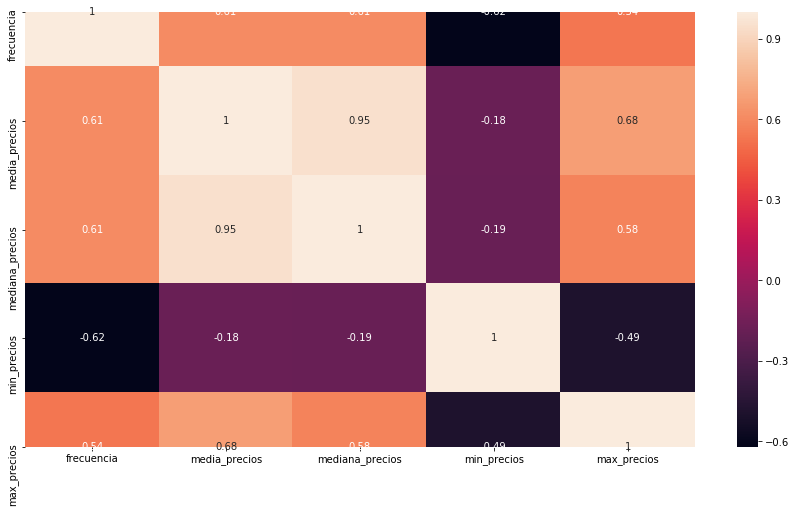

In [20]:
corr = df_stat.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_stat.columns

### Airbnb quantity spaces for rent by neighborhood plot

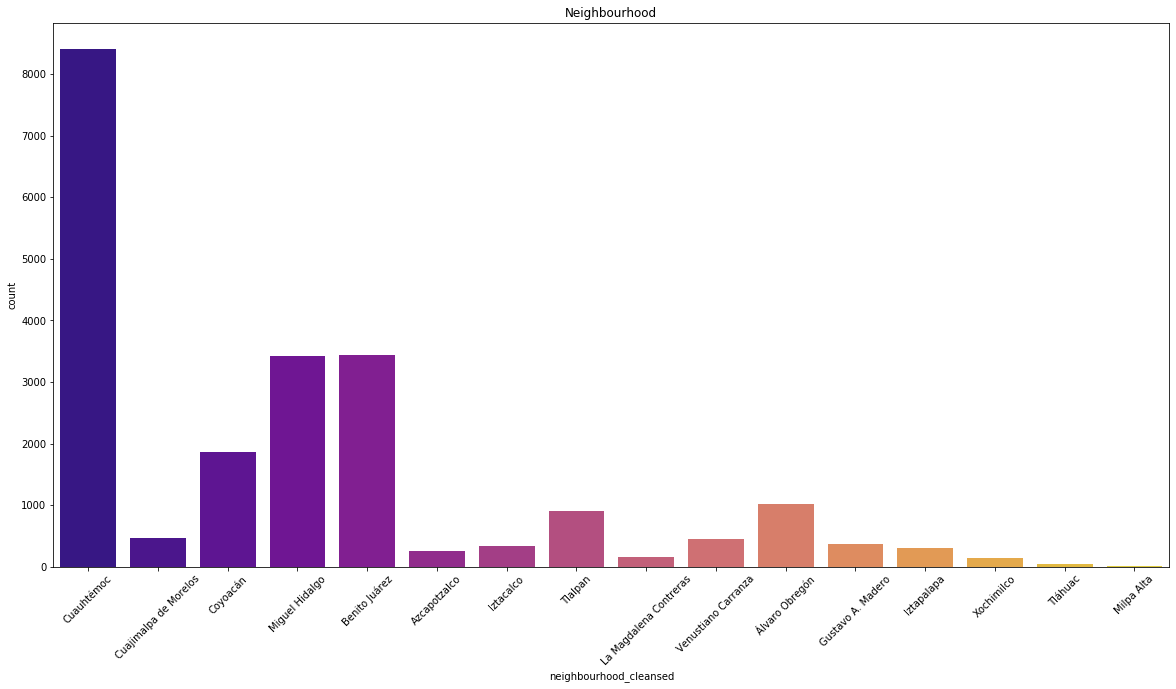

In [32]:
plSe = sns.countplot(df["neighbourhood_cleansed"], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Neighbourhood')
plSe.set_xticklabels(plSe.get_xticklabels(), rotation=45)
plt.show()

As we can see, the neighborhood with more Airbnb rooms is **Cuauhtémoc**

### Calculating price distribution

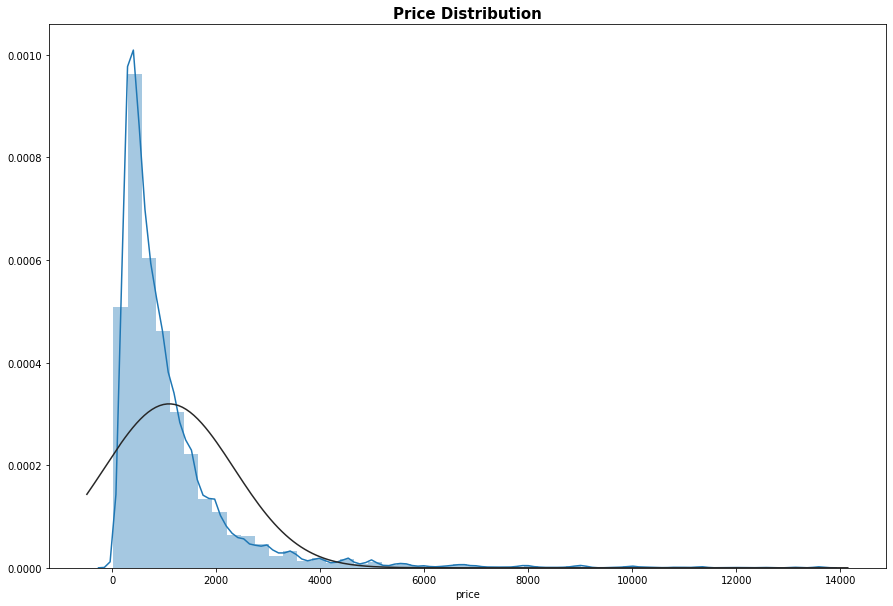

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(df["price"], fit= norm)
plt.title("Price Distribution",size=15, weight='bold')
plt.show()

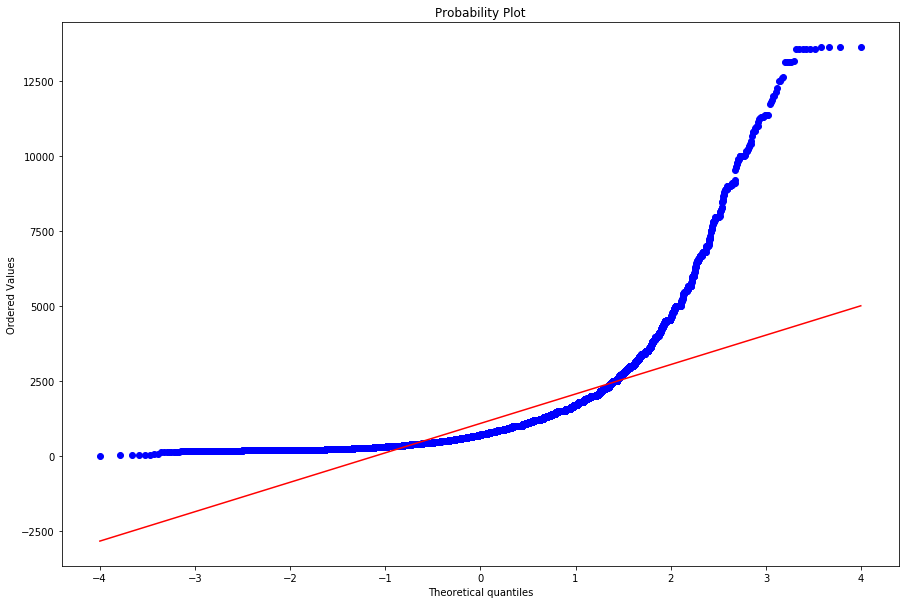

In [24]:
plt.figure(figsize=(15,10))
stats.probplot(df["price"], plot=plt)
plt.show()

### To have a better observation of the behavior of prices, the function log10 is used to transform them

In [25]:
df['price_log'] = np.log(df.price)

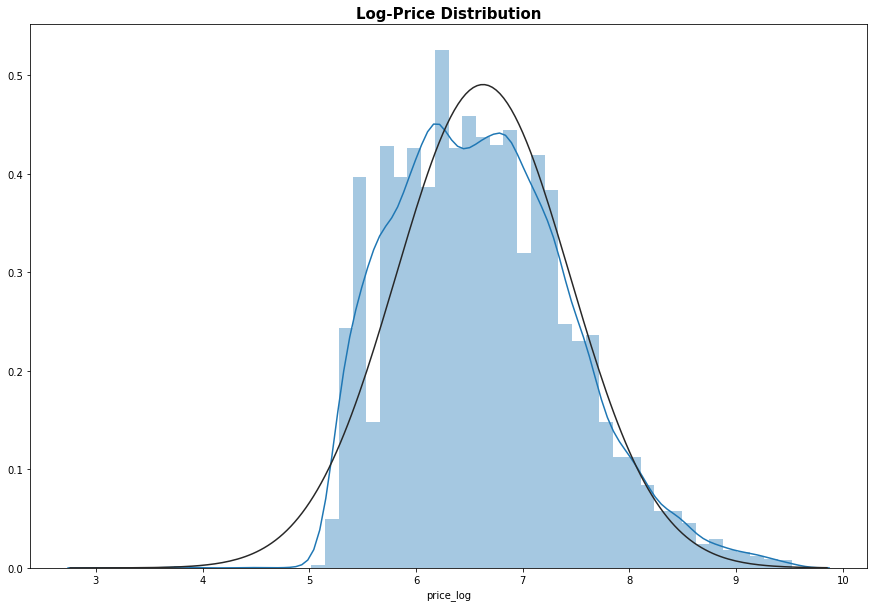

In [26]:
plt.figure(figsize=(15,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution",size=15, weight='bold')
plt.show()

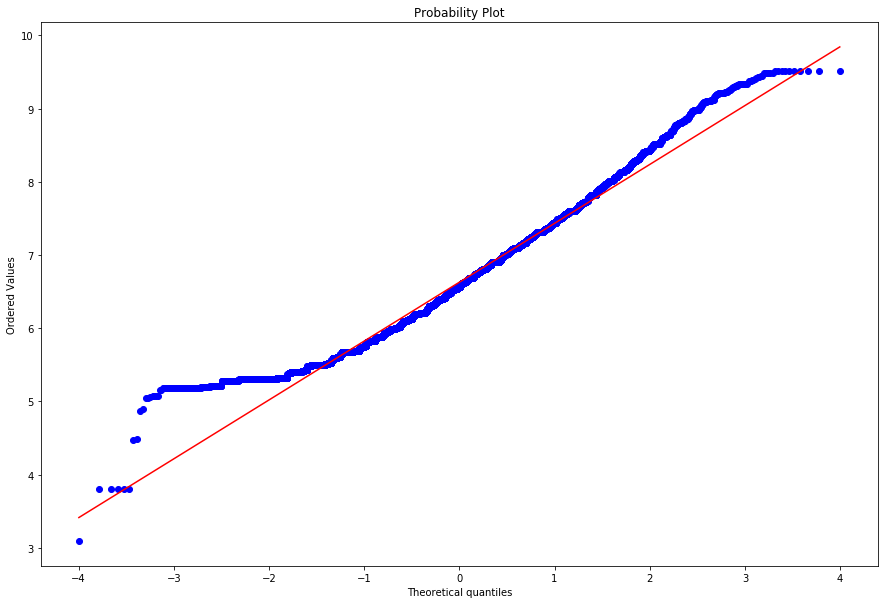

In [27]:
plt.figure(figsize=(15,10))
stats.probplot(df["price_log"], plot=plt)
plt.show()

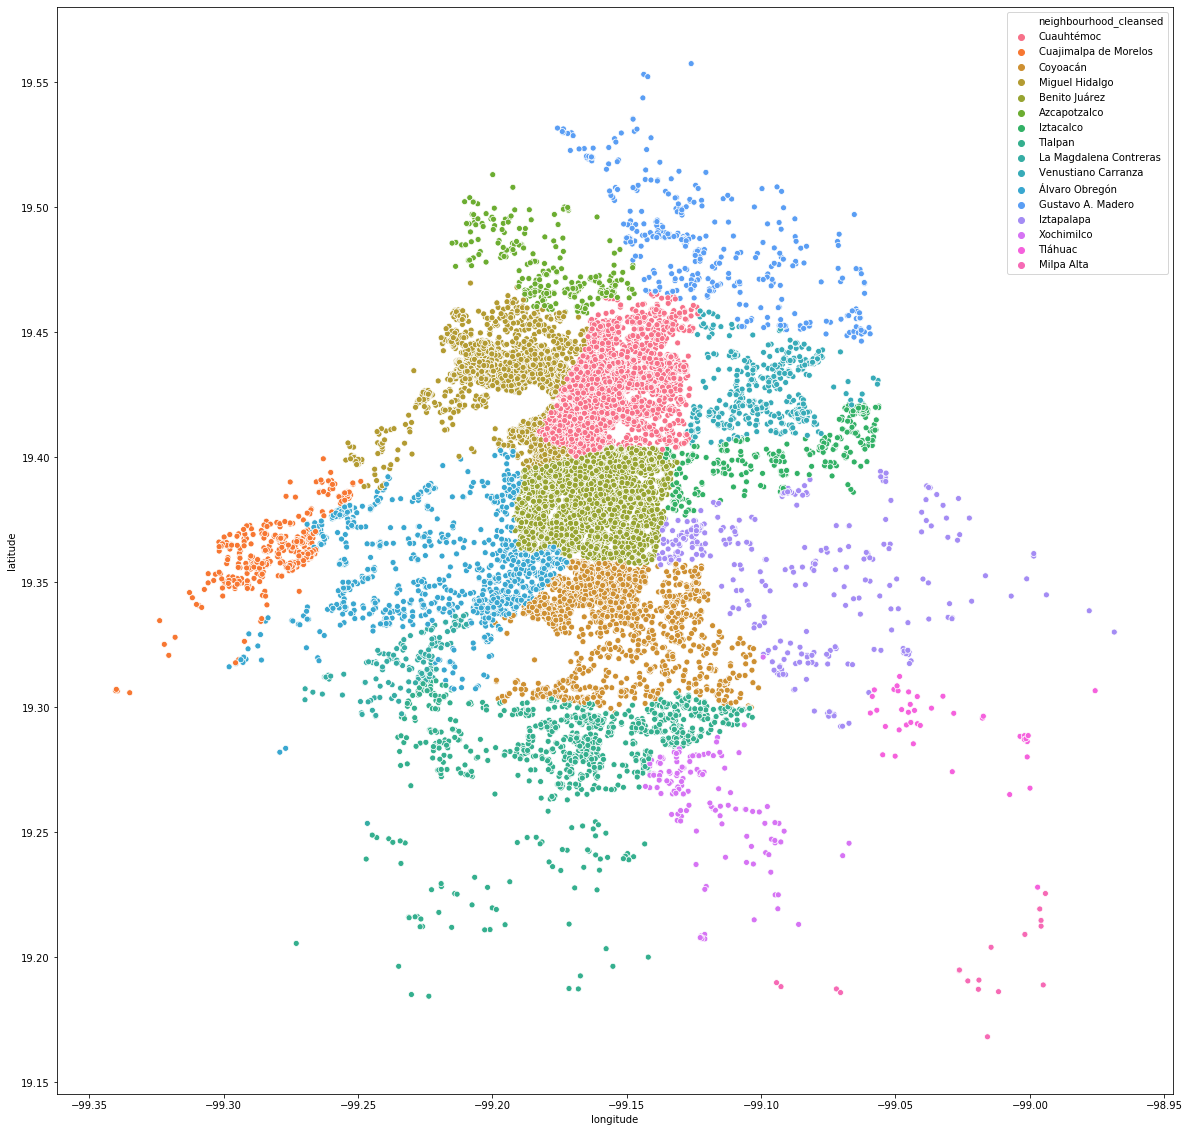

In [28]:
plt.figure(figsize=(20,20))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_cleansed)
plt.ioff()

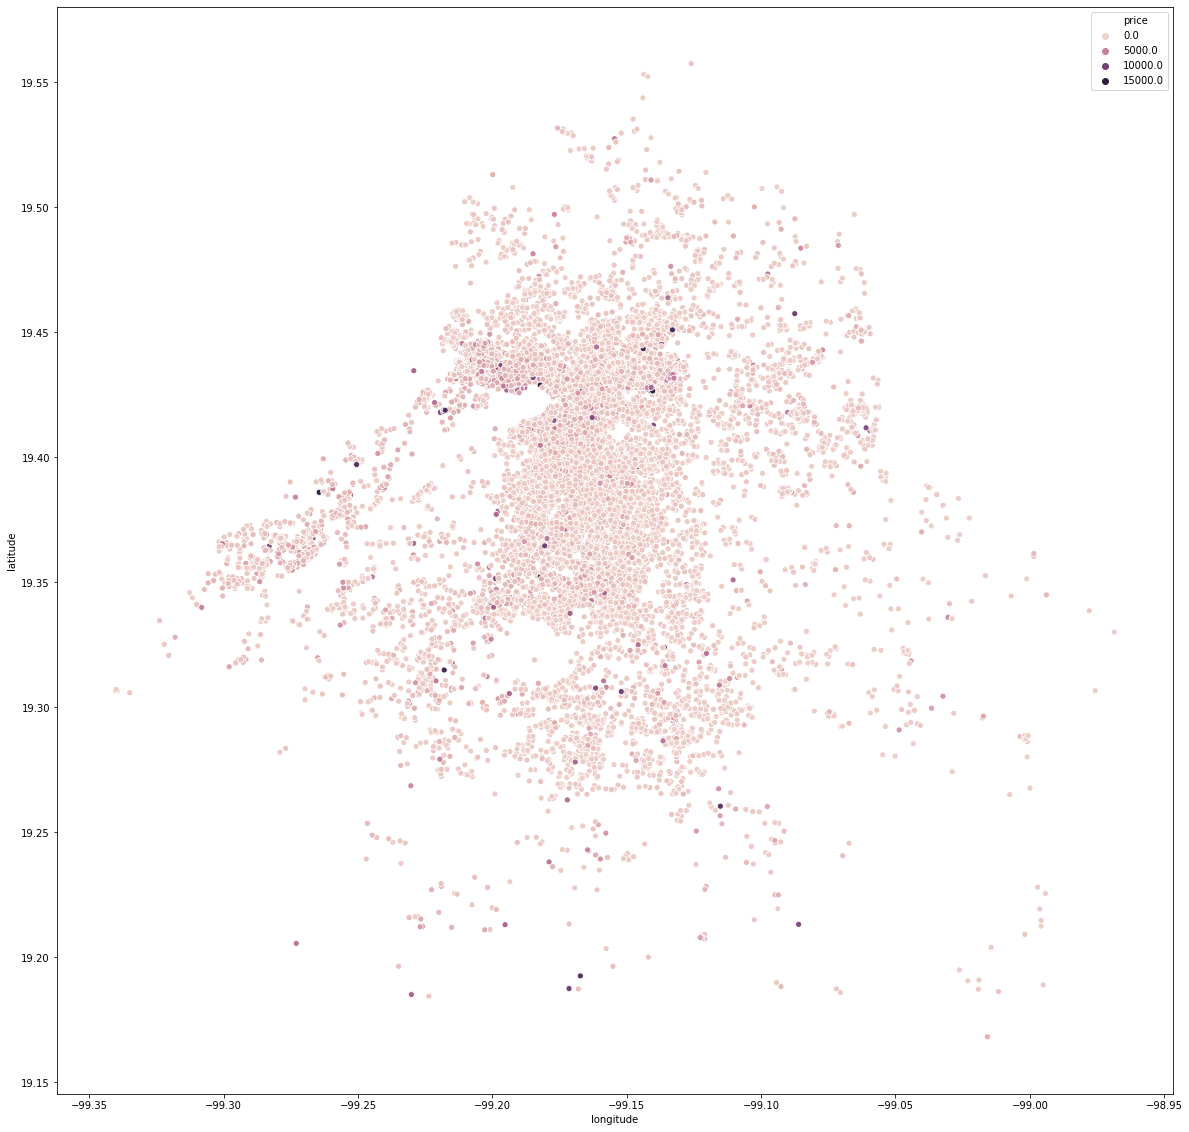

In [29]:
plt.figure(figsize=(20,20))
sns.scatterplot(df.longitude,df.latitude,hue=df.price)
plt.ioff()

### Mean score per neighborhood

In [73]:
mean_neighborhoods = df.groupby(["neighbourhood_cleansed"])["review_scores_rating"].mean()
print(mean_neighborhoods.to_string())

neighbourhood_cleansed
Azcapotzalco              94.761589
Benito Juárez             95.282081
Coyoacán                  95.419331
Cuajimalpa de Morelos     95.798742
Cuauhtémoc                95.034968
Gustavo A. Madero         94.146789
Iztacalco                 94.248031
Iztapalapa                93.700000
La Magdalena Contreras    93.927273
Miguel Hidalgo            95.197657
Milpa Alta                74.000000
Tlalpan                   94.266667
Tláhuac                   95.894737
Venustiano Carranza       94.738292
Xochimilco                92.695652
Álvaro Obregón            95.422254


### Score distribution per Neighborhood

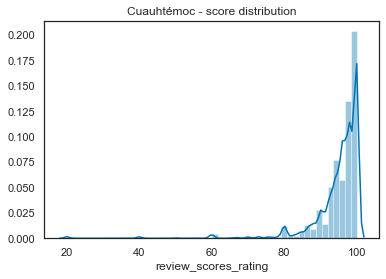

In [74]:
Cuau_df = df[df.neighbourhood_cleansed == "Cuauhtémoc"]["review_scores_rating"]
Cuau_nan = Cuau_df[~np.isnan(Cuau_df)]
sns.distplot(Cuau_nan)
plt.title("Cuauhtémoc - score distribution")
plt.show()

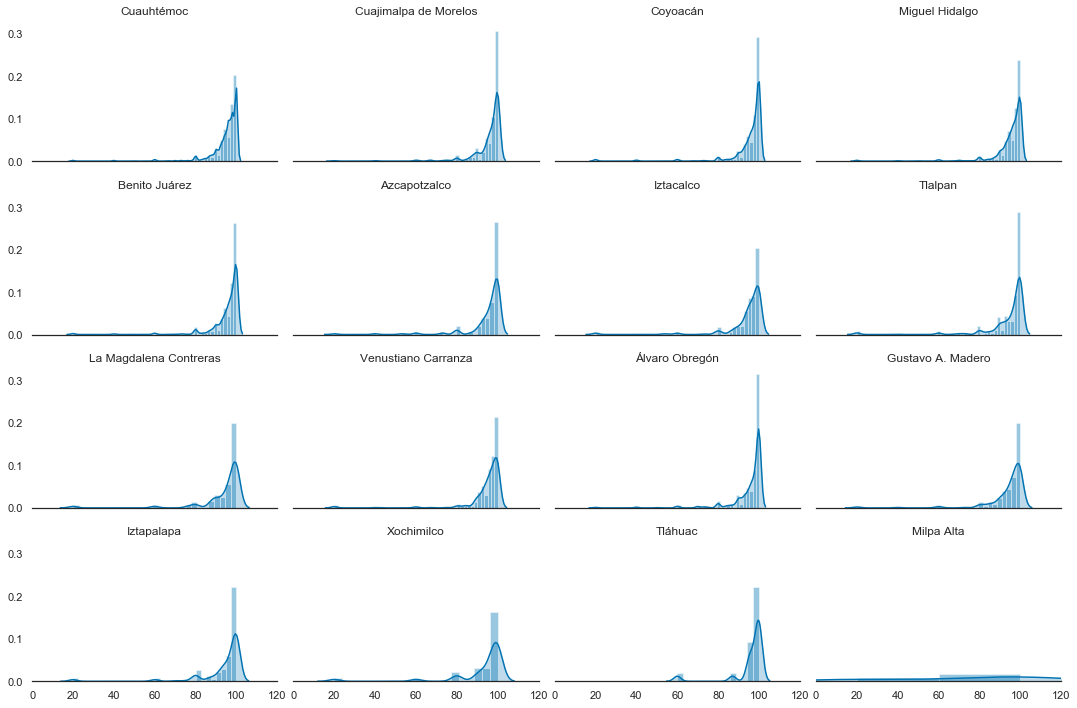

In [76]:
# Plot for the rest of the beighborhoods
sns.set(style="white", palette="colorblind", color_codes=False)

fig, axs = plt.subplots(4, 4, sharex=True, sharey=True,figsize=(15, 10))

for axs,neighborhood in zip(axs.ravel(),df.neighbourhood_cleansed.unique()):
    # Get the new df frame, only neighborhood with review scores
    df_score = df[df.neighbourhood_cleansed == neighborhood]["review_scores_rating"]
    nan = df_score[~np.isnan(df_score)] # Remove de NaNs
    sns.distplot(nan, ax=axs, kde_kws={"shade": True})
    axs.set_title(neighborhood)
    axs.set(xlabel="",xlim=(0,120))
    
plt.tight_layout()
sns.despine(left=True)

Seems the worst neighborhood rated is **Milpa Alta**, but we can't jump into that conclusion since the scores weren't balanced.

### Neighbordhood with max score

In [77]:

# Get the neighborhood with max score
best_neighborhood = mean_neighborhoods.idxmax() 
max_score = round(max(mean_neighborhoods),2)

print("\n{} got the highest rate with {} out of 100 points. This takes into consideration the NaNs.\n".format(best_neighborhood,max_score))


Tláhuac got the highest rate with 95.89 out of 100 points. This takes into consideration the NaNs.



### Neighborhood with min score

In [78]:
# Get the neighborhood with min score
worst_neighborhood = mean_neighborhoods.idxmin() 
min_score = round(min(mean_neighborhoods),2)

print("\n{} got the lowest rate with {} out of 100 points. This takes into consideration the NaNs.\n".format(worst_neighborhood,min_score))


Milpa Alta got the lowest rate with 74.0 out of 100 points. This takes into consideration the NaNs.



### How many people left a proper review score

In [80]:
# Count how many left a review score, since we have seen there are NaN scores 
number_of_reviews = df["review_scores_rating"].count()
reviews = round(number_of_reviews/len(df)*100,2)

print("\n{}% of the people left a review score\n".format(reviews))


76.21% of the people left a review score



### Bad reviews vs good reviews

In [82]:
# Now see the distribution of the bad reviews vs good reviews by neighborhood
# Let's say <90 is a bad review

bad_review = 90

bad_df = df[df["review_scores_rating"] < bad_review].groupby("neighbourhood_cleansed")["review_scores_rating"].count()
#print(bad_df.to_string())

good_df = df[df["review_scores_rating"] >= bad_review].groupby("neighbourhood_cleansed")["review_scores_rating"].count()
#print(good_df)

df_bad_good = pd.DataFrame()
df_bad_good["bad_reviews"] = bad_df
df_bad_good["good_reviews"] = good_df
df_bad_good["bad_review_per"] =  round(bad_df / (bad_df + good_df) ,2)
df_bad_good["good_review_per"] =  round(good_df / (bad_df + good_df),2)

df_bad_good

,bad_reviews,good_reviews,bad_review_per,good_review_per
neighbourhood_cleansed,,,,
Azcapotzalco,15,136,0.10,0.90
Benito Juárez,265,2291,0.10,0.90
Coyoacán,115,1230,0.09,0.91
Cuajimalpa de Morelos,34,284,0.11,0.89
Cuauhtémoc,745,6147,0.11,0.89
Gustavo A. Madero,29,189,0.13,0.87
Iztacalco,31,223,0.12,0.88
Iztapalapa,26,134,0.16,0.84
La Magdalena Contreras,17,93,0.15,0.85


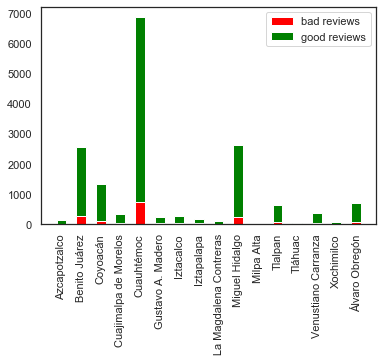

In [83]:
df_bad_good["neighborhood"] = df_bad_good.index
fig,ax = plt.subplots()

ax.bar(df_bad_good.neighborhood,df_bad_good.bad_reviews,0.5,label="bad reviews",color="r")
ax.bar(df_bad_good.neighborhood,df_bad_good.good_reviews,0.5,label="good reviews", color="g", bottom=df_bad_good.bad_reviews)
ax.legend()
plt.xticks(rotation=90)
plt.show()

As we can see this might not be the best plot to display the bad reviews vs good reviews. So now let's try with the percentagee instead of the score points

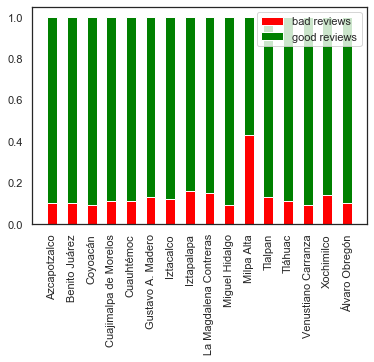

In [84]:
fig,ax = plt.subplots()

ax.bar(df_bad_good.neighborhood,df_bad_good.bad_review_per,0.5,label="bad reviews",color="r")
ax.bar(df_bad_good.neighborhood,df_bad_good.good_review_per,0.5,label="good reviews", color="g", bottom=df_bad_good.bad_review_per)
ax.legend()
plt.xticks(rotation=90)
plt.show()

With this we can see that the probability of having a good room based on the reviews is high (above 80%) except for Milpa Alta.

After doing the relation between bad a good reviews, we can see what neighborhood is the best or worst rated.

In [86]:
best_rate = df_bad_good.good_review_per.max()
best_rated_neighborhood = df_bad_good[df_bad_good.good_review_per == best_rate]

print("The best rated (with {}%) neighborhoods are:".format(best_rate*100))
for neighborhood in best_rated_neighborhood.index:
    print(" - {}".format(neighborhood))

The best rated (with 91.0%) neighborhoods are:
 - Coyoacán
 - Miguel Hidalgo
 - Venustiano Carranza


In [87]:
worst_rate = df_bad_good.bad_review_per.max()
worst_rated_neighborhood = df_bad_good[df_bad_good.bad_review_per == worst_rate]

print("The worst rated (with {}%) neighborhoods are:".format(worst_rate*100))
for neighborhood in worst_rated_neighborhood.index:
    print(" - {}".format(neighborhood))

The worst rated (with 43.0%) neighborhoods are:
 - Milpa Alta


We present the top Airbnb accommodations in Mxico City based only in the score rating received.

We only plot those accommodations with 99 or 100 score rating on a $0-100$ basis

In [114]:
pyproj.set_datapath("~AppData/Local/conda/conda/envs/geo_env/share/proj")

In [115]:
f = folium.Figure(width=30, height=50)
m = folium.Map(location = [19.451054, -99.125519], default_zoom_start = 5)
folium.GeoJson(
    gdf,
     style_function=lambda feature: {
        'fillColor': 'gery',
        'color' : 'black',
        'weight' : 1,
        'fillOpacity' : 0.3,
        }
).add_to(m)

for index, row in top_scores.iterrows():
    tooltip = 'City Hall: {}<br>Room Type: {}<br>Square Feet: {}<br>Price: ${}mxp'.format(row['neighbourhood_cleansed'],row["room_type"],row["square_feet"],row['price'])
    folium.Circle(
        location=[row["latitude"],row["longitude"]],
        tooltip = tooltip,
        radius = 10,
        fill = True,
    ).add_to(m)
m

RuntimeError: b'no arguments in initialization list'

### Average price by room type and Neighborhood

Our main goal will be to find the average price of an [Airbnb](https://es-l.airbnb.com/) accommodation offered by room type among the 16 City Halls in Mexico city and visualize this data on an interactive map.


All accommodation offered in Airbnb is required to be as one of these room types:

- Entire home/apartment
- Hotel room
- Private room
- Shared room

By calculating the average price for one of each of this room types by City Hall, we will be able to find the expensive and cheapper City Hall to get an Airbnb accommodation by room type.

Additionally, we will plot a map with the top accommodations by price.

The results are displayed in seaborn plots and interactive maps using folium to plot geospacial data.

In [88]:
geojson = "https://raw.githubusercontent.com/prope-2020-gh-classroom/practica-final-por-equipos-verano-2020-itam-EddOselotl/master/neighbourhoods.geojson"
### converting the file to geopandas object for mapping
geop = geopandas.read_file(geojson)

In [89]:
desc = df.groupby(['neighbourhood_cleansed','room_type'])['price'].mean().unstack(1)

In [90]:
### group by saved to a new dataframe for plotting
room_type = df.groupby(['room_type','neighbourhood_cleansed'])['price'].mean().reset_index(name ='mean_by_room')

### Using seaborn to plot the distribution

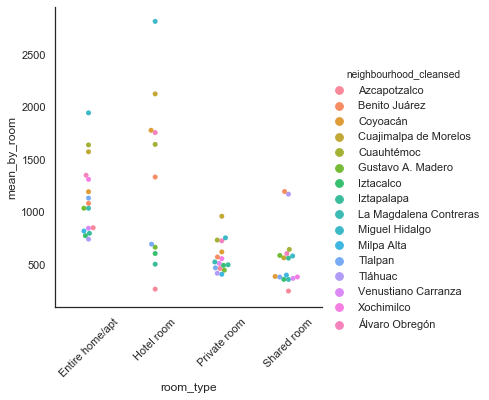

In [91]:
### swarm plot
sns.catplot(x="room_type", y="mean_by_room", hue="neighbourhood_cleansed", kind="swarm", data=room_type).set_xticklabels(rotation=45);

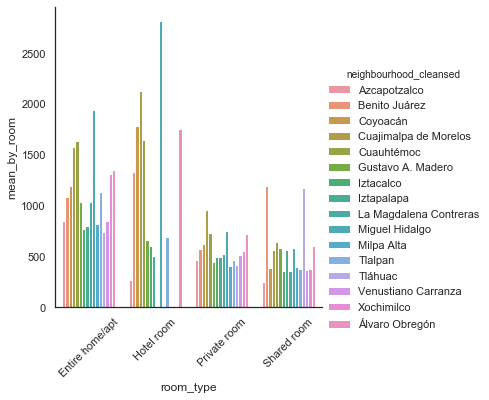

In [92]:
### bar plot
sns.catplot(x="room_type", y="mean_by_room", hue="neighbourhood_cleansed", kind="bar", data=room_type).set_xticklabels(rotation=45);

Next step will be to merge into one data frame mean prices by room type and the accommodations available per category by City Hall and map the data.

In [93]:
count = df.groupby(['neighbourhood_cleansed','room_type'])['id'].count().unstack(1)
desc.reset_index(level=0, inplace=True)
count.reset_index(level=0, inplace=True)

In [94]:
merged = pd.merge(left=desc, right=count, on='neighbourhood_cleansed')
merged.rename(columns = {'neighbourhood_cleansed':'neighbourhood','Entire home/apt_x':'Entire home/apt mean','Hotel room_x':'Hotel room mean',
                    'Private room_x':'Private room mean','Shared room_x':'Shared room mean','Entire home/apt_y':'Entire home/apt count',
                    'Hotel room_y':'Hotel room count','Private room_y':'Private room count','Shared room_y':'Shared room count'}, inplace = True)

### Using Folium and Geopandas to create interative map

We create one map for each one of the room types:

* Entire home/apt
* Hotel room
* Private room
* Shared room

In [116]:
#### Entire home/apt map
home_apt = merged[['neighbourhood','Entire home/apt mean', 'Entire home/apt count']]
home_apt = pd.merge(left = home_apt, right = geop, on = 'neighbourhood')
home_apt.drop(home_apt.columns[[3]], axis=1, inplace=True)
gdf = GeoDataFrame(home_apt, crs = "EPSG:4326", geometry = home_apt.geometry)

colormap = branca.colormap.LinearColormap(
    vmin = gdf['Entire home/apt mean'].quantile(0.0), 
    vmax = gdf['Entire home/apt mean'].quantile(1.0), 
    colors = ['darkgreen','green','lightblue','blue','yellow','orange','red'],
    caption = "Airbnb Entire home/apt mean price by City Hall",
)
m = folium.Map(location = [19.451054, -99.125519], 
               default_zoom_start = 5,
               tiles="Cartodb Positron")

tooltip = GeoJsonTooltip(
    fields = ["neighbourhood","Entire home/apt mean", "Entire home/apt count"],
    aliases = ["City Hall:", "Mean Price:", "Total Accommodations:"],
    localize = True,
    sticky = False,
    labels = True,
    style = """
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
g = folium.GeoJson(
    gdf,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["Entire home/apt mean"])
        if x["properties"]["Entire home/apt mean"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip = tooltip
).add_to(m)

colormap.add_to(m)

m

RuntimeError: b'no arguments in initialization list'

In [96]:
#### Hotel room map
hotel = merged[['neighbourhood','Hotel room mean', 'Hotel room count']]
hotel = pd.merge(left = hotel, right = geop, on = 'neighbourhood')
hotel.drop(hotel.columns[[3]], axis=1, inplace=True)
gdf = GeoDataFrame(hotel, crs = "EPSG:4326", geometry = home_apt.geometry)

colormap = branca.colormap.LinearColormap(
    vmin = gdf['Hotel room mean'].quantile(0.0), 
    vmax = gdf['Hotel room mean'].quantile(1.0), 
    colors = ['darkgreen','green','lightblue','blue','yellow','orange','red'],
    caption = "Airbnb Hotel room mean price by City Hall",
)
m = folium.Map(location = [19.451054, -99.125519], 
               default_zoom_start = 5,
               tiles="Cartodb Positron")

tooltip = GeoJsonTooltip(
    fields = ["neighbourhood","Hotel room mean", "Hotel room count"],
    aliases = ["City Hall:", "Mean Price:", "Total Accommodations:"],
    localize = True,
    sticky = False,
    labels = True,
    style = """
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
folium.GeoJson(
    gdf,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["Hotel room mean"])
        if x["properties"]["Hotel room mean"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip = tooltip
).add_to(m)

colormap.add_to(m)

m

RuntimeError: b'no arguments in initialization list'

In [97]:
#### Private room map
room = merged[['neighbourhood','Private room mean', 'Private room count']]
room = pd.merge(left = room, right = geop, on = 'neighbourhood')
room.drop(room.columns[[3]], axis=1, inplace=True)
gdf = GeoDataFrame(room, crs = "EPSG:4326", geometry = home_apt.geometry)

colormap = branca.colormap.LinearColormap(
    vmin = gdf['Private room mean'].quantile(0.0), 
    vmax = gdf['Private room mean'].quantile(1.0), 
    colors = ['darkgreen','green','lightblue','blue','yellow','orange','red'],
    caption = "Airbnb Private room mean price by City Hall",
)
m = folium.Map(location = [19.451054, -99.125519], 
               default_zoom_start = 5,
               tiles="Cartodb Positron")

tooltip = GeoJsonTooltip(
    fields = ["neighbourhood","Private room mean", "Private room count"],
    aliases = ["City Hall:", "Mean Price:", "Total Accommodations:"],
    localize = True,
    sticky = False,
    labels = True,
    style = """
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
folium.GeoJson(
    gdf,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["Private room mean"])
        if x["properties"]["Private room mean"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip = tooltip
).add_to(m)

colormap.add_to(m)

m

RuntimeError: b'no arguments in initialization list'

In [98]:
#### Shared room map
shared = merged[['neighbourhood','Shared room mean', 'Shared room count']]
shared = pd.merge(left = shared, right = geop, on = 'neighbourhood')
shared.drop(room.columns[[3]], axis=1, inplace=True)
gdf = GeoDataFrame(shared, crs = "EPSG:4326", geometry = home_apt.geometry)

colormap = branca.colormap.LinearColormap(
    vmin = gdf['Shared room mean'].quantile(0.0), 
    vmax = gdf['Shared room mean'].quantile(1.0), 
    colors = ['darkgreen','green','lightblue','blue','yellow','orange','red'],
    caption = "Airbnb Shared room mean price by City Hall",
)
m = folium.Map(location = [19.451054, -99.125519], 
               default_zoom_start = 5,
               tiles="Cartodb Positron")

tooltip = GeoJsonTooltip(
    fields = ["neighbourhood","Shared room mean", "Shared room count"],
    aliases = ["City Hall:", "Mean Price:", "Total Accommodations:"],
    localize = True,
    sticky = False,
    labels = True,
    style = """
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
folium.GeoJson(
    gdf,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["Shared room mean"])
        if x["properties"]["Shared room mean"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip = tooltip
).add_to(m)

colormap.add_to(m)

m

RuntimeError: b'no arguments in initialization list'

In [99]:
### dataframe grouped by City Hall and room type with index as City Hall
tops = df.groupby(['neighbourhood_cleansed','room_type'])['price'].mean().unstack(1)

### Expensive City Hall accommodations by room type

In [100]:
tops.idxmax(0)

room_type
Entire home/apt           Miguel Hidalgo
Hotel room                Miguel Hidalgo
Private room       Cuajimalpa de Morelos
Shared room                Benito Juárez
dtype: object

### Cheappest City Hall accommodations by room type

In [101]:
tops.idxmin()

room_type
Entire home/apt         Tláhuac
Hotel room         Azcapotzalco
Private room         Milpa Alta
Shared room        Azcapotzalco
dtype: object

As we can see, Miguel Hidalgo City Hall leads in both expensive room types categories. on the other side, Azcapotzalco leads in two cheapper room types categories. Looking at the map, these two City Halls are side by side one from the other and both are close to Mexico city downtown. So based only on the mean price by room type, we would recommend to some foreign visitor to reserve an Airbnb accommodation in Azcapotzalco City Hall. See Heat map below.

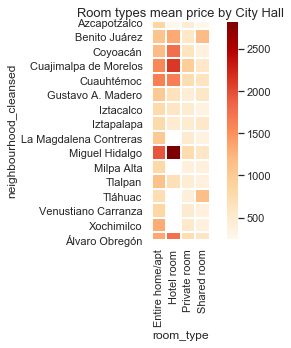

In [102]:
plt.title("Room types mean price by City Hall", fontsize = 13)
sns.heatmap(tops, square=True, cbar_kws={'fraction' : 0.3}, cmap='OrRd', linewidth=1);

Next we present the accommodations offered by City Hall and room type

In [103]:
counts = df.groupby(['neighbourhood_cleansed','room_type'])['id'].count().unstack(1)

### City Hall with more accommodations by room type

In [109]:
counts.idxmax(0)

room_type
Entire home/apt    Cuauhtémoc
Hotel room         Cuauhtémoc
Private room       Cuauhtémoc
Shared room        Cuauhtémoc
dtype: object

### City Hall with less accommodations by room type

In [110]:
counts.idxmin(0)

room_type
Entire home/apt      Milpa Alta
Hotel room         Azcapotzalco
Private room         Milpa Alta
Shared room          Milpa Alta
dtype: object

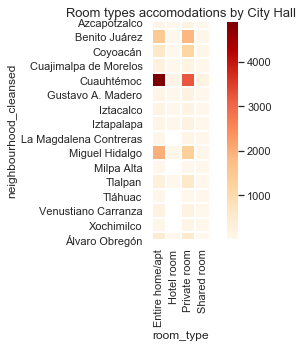

In [106]:
plt.title("Room types accomodations by City Hall", fontsize = 13)
sns.heatmap(counts, square=True, cbar_kws={'fraction' : 0.3}, cmap='OrRd', linewidth=1);